# Modeling Response Rate


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

import warnings
warnings.filterwarnings("ignore")
# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [2]:
## loading the data - this dataset must NOT be changed
Prospects = pd.read_pickle("data/Prospects.pkl")
Prospects["res1_yes"] = (Prospects["res1"] == "Yes").astype(int)
Prospects.head()

,id,zip,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [3]:
# show dataset description
#rsm.describe(intuit75k)

In [4]:
# run python code from another notebook
#%run ./sub-notebooks/model1.ipynb

In [5]:
# importing functions from a module/package
from utils import functions
#functions.example()

## Summary of Models

### Model 1: Decision Trees

Decision Tree Model Pre-processing

To load variables into the decision tree model, the zip_bins variable from the initial data will be converted to a set of dummy variables with the zip-codes for 00801 and 00804. Since there are 3 possibilities for the sex variable, they will be converted to dummy variables as well. The rest of the models will be used as they are.

Decision Tree Model



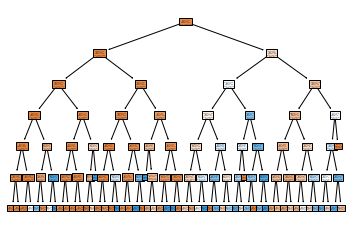



After predicting using this model, the AUC score for the training and testing models are indicated below. After running a cross validation for this model, the only noticeable difference was in the `max_depth` hyper parameter. Since the suggested number was 6, the model above was tuned with 6 as the depth and the results are shown below.

AUC training data for tuned optimal model: 0.7658371647520008
AUC testing data for tuned optimal model: 0.7467773356522853

Fitting 5 folds for each of 8 candidates, totalling 40 fits


The plots below show the cumulative lifts and gains for this model, which show slight indications of overfitting, but are noticeable after the proportion of customers passes 0.3.



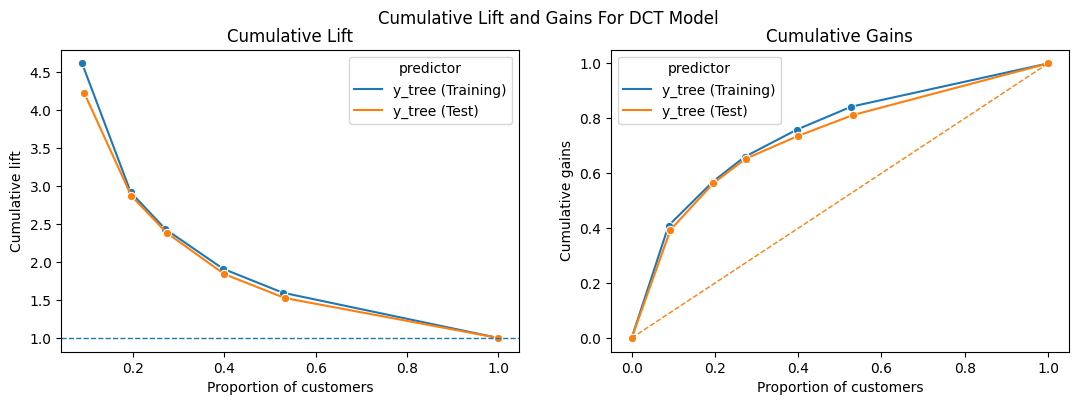

Wave-2 Scaled Campaign with the decision tree model: The Profit is $319,883 and the the return on investment is 409.75% 



In [6]:
%run ./tree.ipynb

### Model 2: Random Forest

Random Forest - Data Pre-processing

Before building and loading a random forest model, we will pre-process the data. To do so, we added the new zip code variables for 00801 and 00804 and converted the zip bins and sex variables to dummies.
 
Random Forest Model 

Cross validation to get best parameters 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
The best parameters are {'max_depth': 7, 'max_features': 4, 'n_estimators': 400, 'random_state': 200}
The best score is 0.7634082841204135
The AUC for the prediction is 0.7952042006390201

Final Random Forest model with best parameters 

The AUC score of final model is 0.7059964919257514
Profit Calculations and Plots 

The Profit for test set in wave 1 is $37,725 
Wave-2 Scaled Campaign: The Profit is $442,131 and the the return on investment is 137.21% 


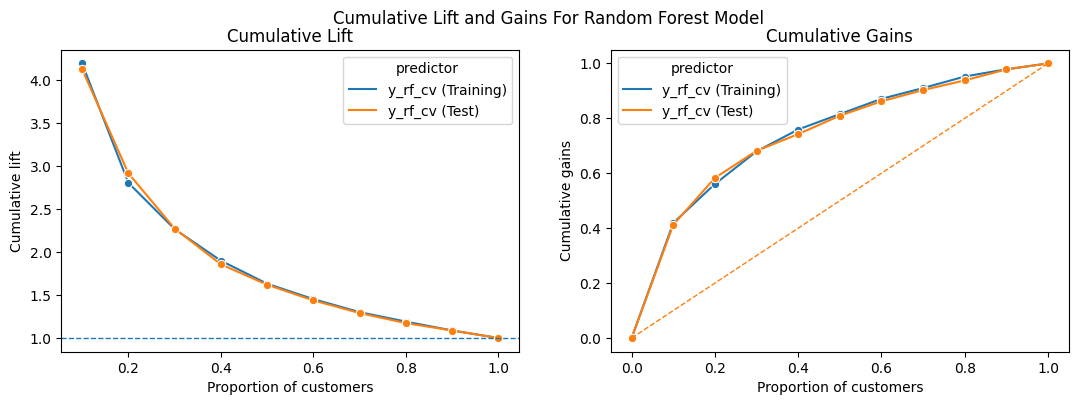

In [7]:
%run ./random.ipynb

### Model 3: Neural Networks (SKLearn & Keras)

Neural Networds Data Pre-processing

Before building and loading a neural network model, we will pre-process the data. To do so, with the addition of new zip code variables for 00801 and 00804, te conversion of the sex variables to dummies, the following variables were dropped: zip_bins & sincepurch.
 
After processing the data, to build the sklearn neural network, the activation used was relu and the solver was adam. Initially starting with 1 hidden layer, we adapted and changed to 3 hidden layers. The results of this neural network model can be seen below. 

AUC training data for intial model: 0.7665061411955052
AUC testing data for intial model: 0.7617739728555164

Fitting 5 folds for each of 18 candidates, totalling 90 fits


After cross validating for neural networks to find the ideal hidden layers and alpha values, the best model had hidden layer size of (4,4) and alpha value of 0.01. The AUC scores for the following are shown below.

AUC training data for adjusted trained model:

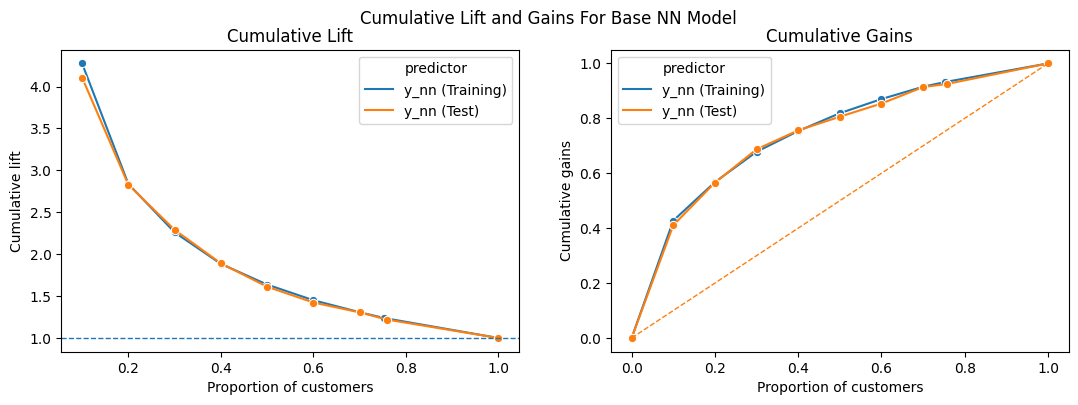

Wave-2 Scaled Campaign (SKLearn Tuned): The Profit is $453,127 and the the return on investment is 139.22% 



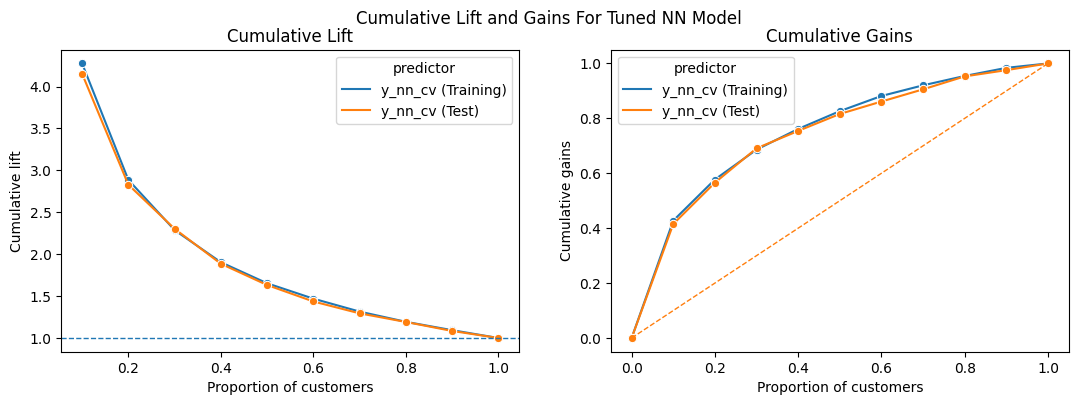

AUC training data for sklearn neural network ensemble model: 0.7712445545412772
AUC testing data for sklearn neural network ensemble model: 0.7648546192599255
Wave-2 Scaled Campaign (SKLearn Ensemble): The Profit is $447,177 and the the return on investment is 137.03% 




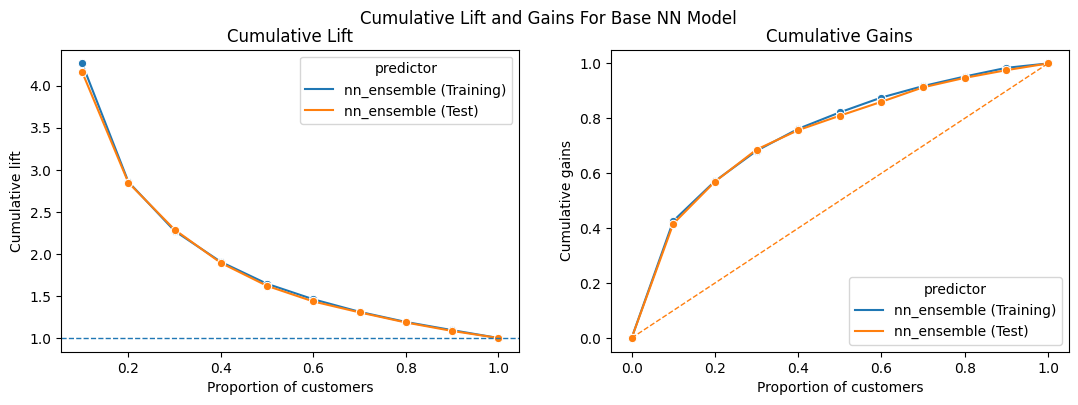

We will continue onto build a Keras neural network model next.

We will begin by building a base model with 2 hidden layers and to avoid overfitting, a dropout of 0.1 will also be used with 2 hidden layers, with units of 12 and 16 respectively.

Epoch 1/25
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6086 - accuracy: 0.8853 - val_loss: 0.4643 - val_accuracy: 0.9525
Epoch 2/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4227 - accuracy: 0.9526 - val_loss: 0.2931 - val_accuracy: 0.9525
Epoch 3/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2808 - accuracy: 0.9523 - val_loss: 0.2106 - val_accuracy: 0.9525
Epoch 4/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2247 - accuracy: 0.9517 - val_loss: 0.1938 - val_accuracy: 0.9525
Epoch 5/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2177 - accuracy: 0.9506 - val_loss: 0.1905 - val_accuracy: 0.9525
Epoch 6/25
1313/1313 [============

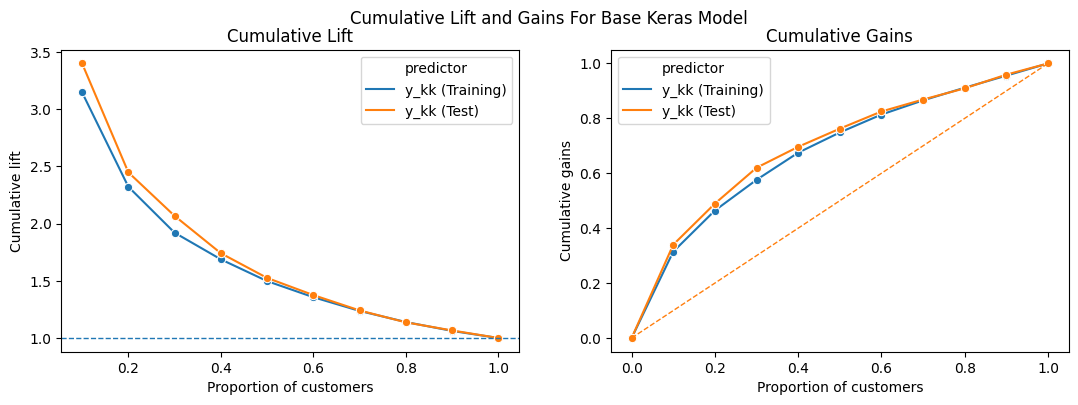

Wave-2 Scaled Campaign (Tuned Keras): The Profit is $404,262 and the the return on investment is 93.72% 



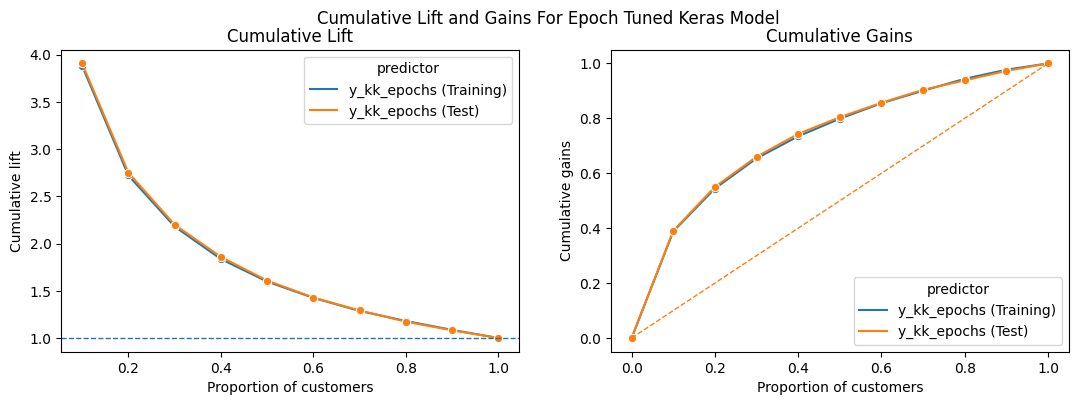

In [8]:
%run ./nn.ipynb

### Model 4: XGBoost

AUC training data for model: 0.7773267812281904
AUC test data for model: 0.7649020750953851
Wave-2 Scaled Campaign: The Profit is $452,060 and the the return on investment is 131.47% 



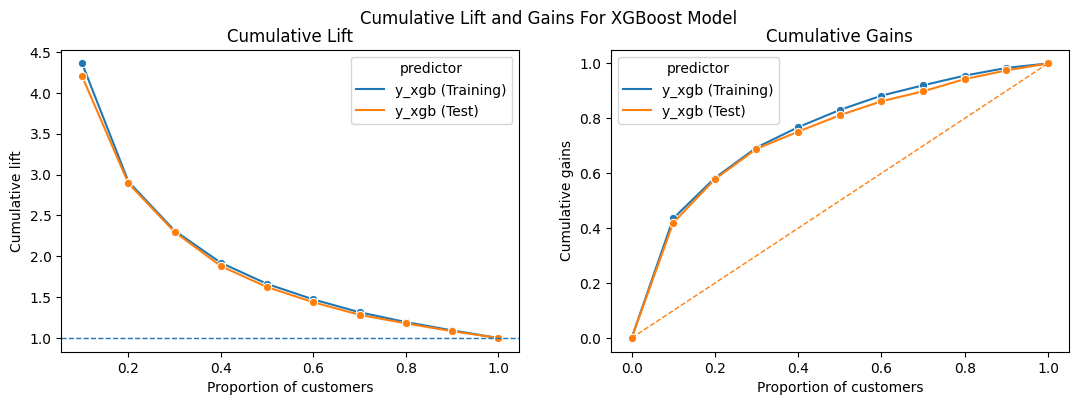

 The output above is the result of an XGBoost model with the hyperparameters set to:
    min_child_weight=5,
    colsample_bylevel=1,
    max_delta_step=0,
    scale_pos_weight=1,
    alpha=1,
    reg_lambda=0,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=1,
    gamma=1,
    max_depth=3,
    n_estimators=500 
 The graphs above show the cumulative lift and gains for the XGBoost model predicted on both the training and test datasets. And plots and the AUC indicate a low overfitting, if any.
  


In [9]:
## Question answers
%run ./xgb.ipynb

The output above is the result of an XGBoost model with the hyperparameters set to:
* min_child_weight=5
* colsample_bylevel=1
* max_delta_step=0
* scale_pos_weight=1
* alpha=1
* reg_lambda=0
* learning_rate=0.01
* subsample=0.8
* colsample_bytree=1
* gamma=1
* max_depth=3
* n_estimators=500
 
 The graphs above show the cumulative lift and gains for the XGBoost model predicted on both the training and test datasets.

## Final Profit Calculations

In [11]:
# read in Dtree file
dtree_df = pd.read_csv('./data/DTree.csv')
dtree_df = dtree_df.drop(['mod_resp', 'mod_mail'], axis = 1)
#read in nn file
nn_df = pd.read_csv('./data/NN.csv')
nn_df = nn_df.drop(['best_nn', 'mod_resp', 'mod_mail', 'res1_yes', 'training'], axis = 1)
#read in random file
random_df = pd.read_csv('./data/Random.csv')
random_df = random_df.drop(['mod_resp', 'mod_mail'], axis = 1)
#read in xgb file
xgb_df = pd.read_csv('./data/XGB.csv')
xgb_df = xgb_df.drop(['mod_resp', 'mod_mail', 'res1_yes', 'training'], axis = 1)


#merge dfs with response rates that we want (these are for wave 1)
fin_df = dtree_df.merge(nn_df, on = 'id', how = 'left')
temp_df = random_df.merge(xgb_df, on = 'id', how = 'left')
fin_df = fin_df.merge((temp_df.drop(['res1_yes', 'training'], axis = 1)), on = 'id', how = 'left')

In [12]:
#creating an ensemble of 3 model predictions
fin_df['ensemble'] = (fin_df['y_nn_cv'] + fin_df['y_rf_cv'] + fin_df['y_xgb'])/3

In [13]:
testing = fin_df[fin_df['training'] == 0]
break_even = 1.41 / 60

In [14]:
def fin_profit(resp, eval_dat):
    # calculating the profit for wave-2 on test set
    breakeven = 1.41 / 60
    wave2_target = 763334
    eval_dat['mod_resp'] = eval_dat[resp] * 0.5
    eval_dat['mod_mail'] = eval_dat['mod_resp'] > breakeven
    df = eval_dat[eval_dat['training']==0]
    
    mail_true= sum(df['mod_mail']) #num of yes in test set
    mail_true_rate = mail_true / df.shape[0] #proportion to yes is test set
    buy_true = df[(df['mod_mail']==True) & (df['res1_yes']==1)] #true positives
    
    mail_number = wave2_target * mail_true_rate #customers to mail
    adjusted_rr = (buy_true.shape[0] * 0.5) / mail_true #adjusted buy rate
    wave2_buyers = adjusted_rr * mail_number #buyers in wave 2
   
    mail_cost = 1.41 * mail_number 
    profit = 60 * wave2_buyers - mail_cost
    rome = profit / mail_cost
    
    return profit,rome

In [15]:
# function for the lifts and gains plot
def plot(resp, model):
    # lift and gains plot
    w = 13
    h = 4
    d = 100
    fig = plt.figure(figsize=(w, h), dpi=d)
    fig.suptitle(f"Cumulative Lift and Gains For {model} Model")

    fig1 = fig.add_subplot(122)
    fig1.set_title("Cumulative Gains")
    fig1 = rsm.gains_plot(
        {
            "Training": fin_df.query("training == 1"),
            "Test": fin_df.query("training == 0"),
        },
        rvar="res1_yes",
        pred=resp,
        lev=1,
        qnt=10,
    )

    fig2 = fig.add_subplot(121)
    fig2.set_title("Cumulative Lift")
    fig2 = rsm.lift_plot(
        {
            "Training": fin_df.query("training == 1"),
            "Test": fin_df.query("training == 0"),
        },
        rvar="res1_yes",
        pred=resp,
        lev=1,
        qnt=10,
    )

The overall profit for an ensemble model with predictions from the best sklearn Neural Networks, Random Forest and XGBoost models is $459,217 and the rome is 138.49%. 



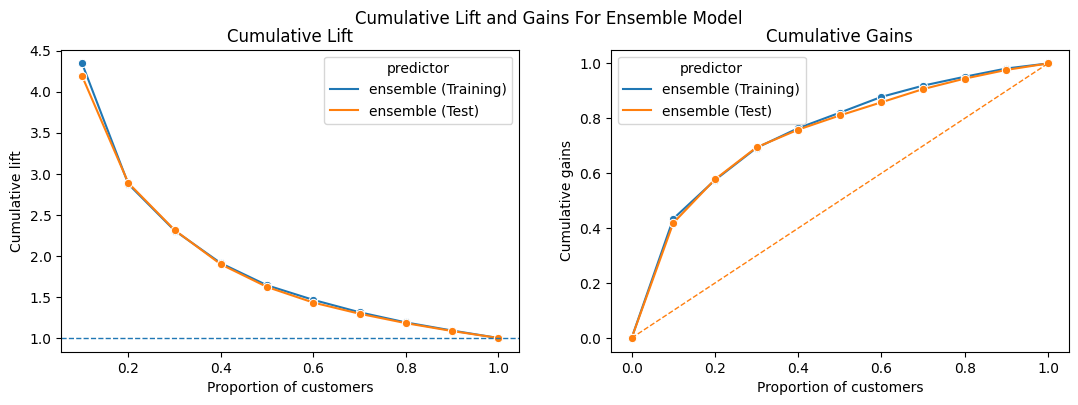

In [16]:
plot('ensemble', 'Ensemble')
tot_prof, tot_rome = fin_profit('ensemble', testing)
print(f'The overall profit for an ensemble model with predictions from the best sklearn Neural Networks, Random Forest and XGBoost models is ${int(tot_prof):,} and the rome is {round(float(tot_rome)*100,2):,}%. \n')

In [18]:
# generate a csv file to submit
testing["mailto_wave2"] = np.where(
    testing["res1_yes"] == 1, False, testing["mod_resp"] > break_even
)
submission = testing[testing["training"] == 0]
submission = submission[["id", "mailto_wave2"]]

submission.to_csv("./data/Haritha_Julian_Praveen_Will_Team17.csv", index=False)